In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

2. (45 points total) We have seen that we can fit an SVM with a non-linear kernel in order
to perform classification using a non-linear decision boundary.We will now see that we
can also obtain a non-linear decision boundary by performing logistic regression using
non-linear transformations of the features

(a) (5 points) Generate a data set with n = 500 and p = 2, such that the observations
belong to two classes with a quadratic decision boundary between them. For
instance, you can do this as follows:
> x1=runif (500) -0.5
> x2=runif (500) -0.5
> y = 1*( x1b2-x2b2 > 0)

In [102]:
np.random.seed(8)

In [103]:
x1 = np.random.random((500,)) -0.5

In [104]:
x1

array([ 0.3734294 ,  0.46854066,  0.36919454,  0.03085569, -0.26727167,
       -0.4886012 , -0.06953118, -0.09764864,  0.02267467, -0.0216082 ,
        0.05535647,  0.04338602,  0.26089558,  0.21237457,  0.1196821 ,
       -0.07390823, -0.21092497,  0.47385524, -0.16622595, -0.28119894,
       -0.43419161,  0.48287055, -0.37214429, -0.17786921, -0.42905716,
       -0.27523006, -0.10636509,  0.396145  , -0.15453839,  0.48474944,
       -0.47126795, -0.14831526, -0.11904111,  0.26416013,  0.43880391,
       -0.1803102 , -0.06752407, -0.22985426,  0.30105589,  0.13823881,
       -0.43130987,  0.10364448,  0.29557456, -0.46799184, -0.04455218,
        0.29017254,  0.48859652,  0.08396454, -0.4610877 , -0.05357709,
       -0.31182748,  0.12705565, -0.2846822 , -0.34902989,  0.03614431,
       -0.39961321,  0.23115843,  0.43965104,  0.44331818, -0.12526149,
        0.09575025,  0.16198271,  0.01058046, -0.02910742, -0.49112771,
       -0.4321036 , -0.06518377, -0.06850637, -0.31411631,  0.02

In [105]:
x2 = np.random.random((500,)) -0.5

In [106]:
y = 1*(x1**2 - x2**2 > 0)

In [80]:
y

array([1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,

(b) (5 points) Plot the observations, colored according to their class labels. Your plot
should display X1 on the x-axis, and X2 on the yaxis.

In [107]:
df = pd.DataFrame()
df['x1'] = x1
df['x2'] = x2
df['y'] = y

Text(0,0.5,'x2')

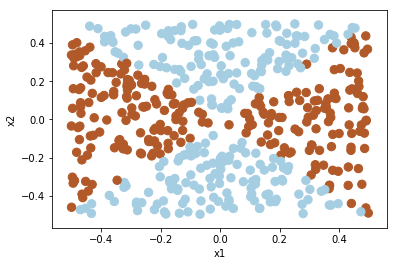

In [110]:
plt.scatter(x1, x2, s=70, c=y, cmap=mpl.cm.Paired)
plt.xlabel('x1')
plt.ylabel('x2')

(c) (5 points) Fit a logistic regression model to the data, using X1 and X2 as predictors.

In [83]:
import sklearn.linear_model as lm
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.model_selection import train_test_split

In [111]:
x = df[['x1', 'x2']]
y = df['y']

model = lm.LogisticRegression()
ynew = model.fit(x, y).predict(x)

(d) (5 points) Apply this model to the training data in order to obtain a predicted
class label for each training observation. Plot the observations, colored according
to the predicted class labels. The decision boundary should be linear.

Text(0,0.5,'x2')

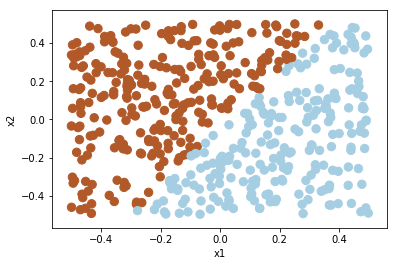

In [112]:
plt.scatter(x1, x2, s=70, c=ynew, cmap=mpl.cm.Paired)
plt.xlabel('x1')
plt.ylabel('x2')

(e) (5 points) Now fit a logistic regression model to the data using non-linear functions
of X1 and X2 as predictors (e.g. X2
1
, X1 × X2, log(X2), and so forth).

In [113]:
df['x1no'] = df.x1 + df.x1**2

In [114]:
df['x2no'] = df.x2 + df.x2**2

In [115]:
x = df[['x1no', 'x2no']]
y = df['y']
model = lm.LogisticRegression()
ynew = model.fit(x, y).predict(x)

(f) (5 points) Apply this model to the training data in order to obtain a predicted
class label for each training observation. Plot the observations, colored according
to the predicted class labels. The decision boundary should be obviously nonlinear.
If it is not, then repeat (a)-(e) until you come up with an example in
which the predicted class labels are obviously non-linear.

Text(0,0.5,'x2')

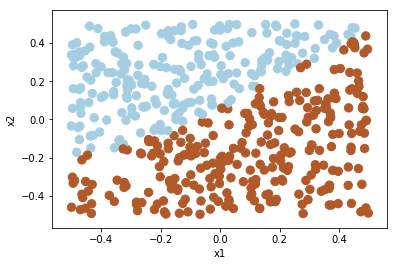

In [116]:
plt.scatter(x1, x2, s=70, c=ynew, cmap=mpl.cm.Paired)
plt.xlabel('x1')
plt.ylabel('x2')

In [117]:
df['x3'] = df.x1 * df.x2

In [118]:
x = df[['x1no', 'x2no', 'x3']]
y = df['y']
model = lm.LogisticRegression()
ynew = model.fit(x, y).predict(x)

Text(0,0.5,'x2')

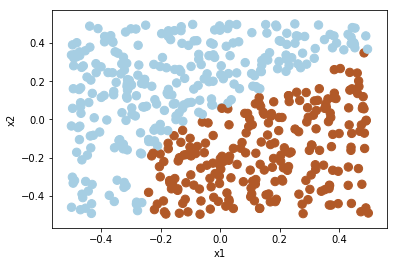

In [119]:
plt.scatter(x1, x2, s=70, c=ynew, cmap=mpl.cm.Paired)
plt.xlabel('x1')
plt.ylabel('x2')

This model is obviously non-linear but does not fit data well

(g) (5 points) Fit a support vector classifier to the data with X1 and X2 as predictors.
Obtain a class prediction for each training observation. Plot the observations,
colored according to the predicted class labels.

In [82]:
from sklearn.svm import SVC

In [120]:
x = df[['x1', 'x2']]
y = df['y']

svm = SVC(C=1, kernel='linear')
ynew = svm.fit(x, y).predict(x)

Text(0,0.5,'x2')

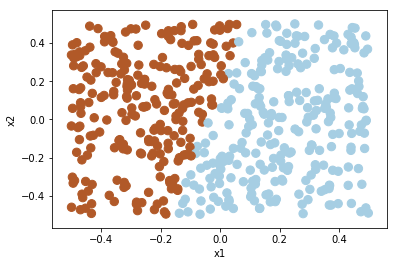

In [121]:
plt.scatter(x1, x2, s=70, c=ynew, cmap=mpl.cm.Paired)
plt.xlabel('x1')
plt.ylabel('x2')

(h) (5 points) Fit a SVM using a non-linear kernel to the data. Obtain a class
prediction for each training observation. Plot the observations, colored according
to the predicted class labels.

In [122]:
x = df[['x1', 'x2']]
y = df['y']

svm = SVC(C=1.0, kernel='poly', degree=2, gamma=1)
ynew = svm.fit(x, y).predict(x)

Text(0,0.5,'x2')

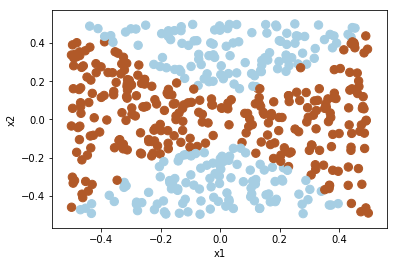

In [123]:
plt.scatter(x1, x2, s=70, c=ynew, cmap=mpl.cm.Paired)
plt.xlabel('x1')
plt.ylabel('x2')

(i) (5 points) Comment on your results.

The polynomial fit with degree 2 was able to adequately model the data

3. (20 points total) At the end of Section 9.6.1, it is claimed that in the case of data that is
just barely linearly separable, a support vector classifier with a small value of cost that
misclassifies a couple of training observations may perform better on test data than
one with a huge value of cost that does not misclassify any training observations. You
will now investigate this claim.

(a) (5 points) Generate two-class data with p = 2 in such a way that the classes are
just barely linearly separable.

In [124]:
# Generating random data: 20 observations of 2 features and divide into two classes.
np.random.seed(5)
X = np.random.randn(50,2)
y = np.repeat([1,-1], 10)

X[y == -1] = X[y == -1] +1

In [255]:
np.random.seed(1)
X = np.random.randn(35,2)
y = np.random.choice([-1,1], 35)
X[y == 1] = X[y == 1] -1

Text(0,0.5,'X2')

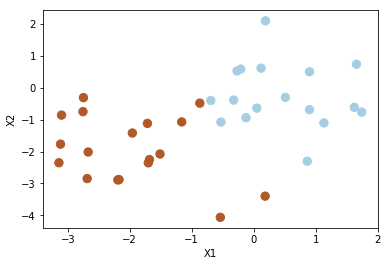

In [256]:
X[y == 1] = X[y == 1] -1
plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

(b) (5 points) Compute the cross-validation error rates for support vector classifiers
with a range of cost values. How many training errors are misclassified for each
value of cost considered, and how does this relate to the cross-validation errors
obtained?

In [257]:
from sklearn.model_selection import GridSearchCV

# Select the optimal C parameter by cross-validation
tuned_parameters = [{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}]
clf = GridSearchCV(SVC(kernel='linear'), tuned_parameters, cv=10, scoring='accuracy', return_train_score=True)
clf.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [258]:
clf.cv_results_

{'mean_fit_time': array([0.0004262 , 0.00044439, 0.00037103, 0.00032163, 0.00028591,
        0.0002691 , 0.00026114]),
 'std_fit_time': array([7.44413059e-05, 1.19348800e-04, 3.43618663e-05, 3.28453936e-05,
        5.53288109e-05, 4.50381531e-05, 3.02752263e-05]),
 'mean_score_time': array([0.00029619, 0.00027416, 0.00024083, 0.00022993, 0.00022318,
        0.00018396, 0.00017915]),
 'std_score_time': array([1.17498813e-04, 4.22463258e-05, 1.22201791e-05, 3.00023424e-05,
        9.87190229e-05, 5.75295682e-06, 1.55185406e-05]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 5, 10, 100],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 5},
  {'C': 10},
  {'C': 100}],
 'split0_test_score': array([0.5 , 1.  , 1.  , 1.  , 1.  , 1.  , 0.75]),
 'split1_test_score': array([0.5, 1. , 1. , 1. , 1. , 1. , 1. ]),
 'split2_test_score': array([0.5,

In [225]:
clf.best_params_

{'C': 0.01}

This shows that while the higher cost values resulted in lower mean train scores, with 100 resulting in 100% classification. 0.01 and 0.1 actually resulted in the highest correct test classification rate.

(c) (5 points) Generate an appropriate test data set, and compute the test errors
corresponding to each of the values of cost considered. Which value of cost
leads to the fewest test errors, and how does this compare to the values of cost
that yield the fewest training errors and the fewest cross-validation errors?

Text(0,0.5,'X2')

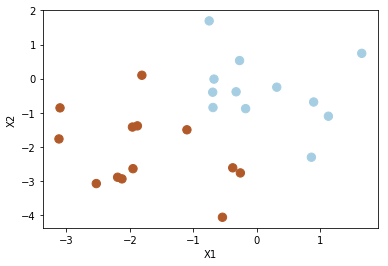

In [283]:
np.random.seed(1)
X_test = np.random.randn(25,2)
y_test = np.random.choice([-1,1], 25)
X_test[y_test == 1] = X_test[y_test == 1] -1
X_test[y_test == 1] = X_test[y_test == 1] -1
plt.scatter(X_test[:,0], X_test[:,1], s=70, c=y_test, cmap=mpl.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

In [284]:
svc2 = SVC(C=0.001, kernel='linear')
svc2.fit(X, y)
y_pred = svc2.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_pred), index=svc2.classes_, columns=svc2.classes_)

,-1,1
-1,0,12
1,0,13


In [285]:
svc2 = SVC(C=0.01, kernel='linear')
svc2.fit(X, y)
y_pred = svc2.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_pred), index=svc2.classes_, columns=svc2.classes_)

,-1,1
-1,12,0
1,0,13


In [286]:
svc2 = SVC(C=0.1, kernel='linear')
svc2.fit(X, y)
y_pred = svc2.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_pred), index=svc2.classes_, columns=svc2.classes_)

,-1,1
-1,12,0
1,0,13


In [287]:
svc2 = SVC(C=1, kernel='linear')
svc2.fit(X, y)
y_pred = svc2.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_pred), index=svc2.classes_, columns=svc2.classes_)

,-1,1
-1,12,0
1,0,13


In [288]:
svc2 = SVC(C=5, kernel='linear')
svc2.fit(X, y)
y_pred = svc2.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_pred), index=svc2.classes_, columns=svc2.classes_)

,-1,1
-1,12,0
1,0,13


In [289]:
svc2 = SVC(C=10, kernel='linear')
svc2.fit(X, y)
y_pred = svc2.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_pred), index=svc2.classes_, columns=svc2.classes_)

,-1,1
-1,12,0
1,0,13


In [290]:
svc2 = SVC(C=100, kernel='linear')
svc2.fit(X, y)
y_pred = svc2.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_pred), index=svc2.classes_, columns=svc2.classes_)

,-1,1
-1,11,1
1,0,13


Findings are consistent with the cross validation results. The models from low to c=10 performed similar and then when the model began fitting the training data perfectly (C=100) the performance on the test began to faulter.

(d) (5 points) Discuss your results

Same as discussion above, the results of this experiment correspond to the initial claim.

5. (10 points total) In Section 10.2.3, a formula for calculating PVE was given in Equation
10.8. We also saw that the PVE can be obtained using the sdev output of the prcomp()
function. On the USArrests data, calculate PVE in two ways:

(a) (5 points) Using the sdev output of the prcomp() function, as was done in Section
10.2.3.

In [2]:
df = pd.read_csv('~/Documents/USArrests.csv', index_col=0)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [3]:
from sklearn.preprocessing import scale
X = pd.DataFrame(scale(df), index=df.index, columns=df.columns)

In [5]:
from sklearn.decomposition import PCA
# Fit the PCA model and transform X to get the principal components
pca = PCA()
df_plot = pd.DataFrame(pca.fit_transform(X), columns=['PC1', 'PC2', 'PC3', 'PC4'], index=X.index)
df_plot.head()

,PC1,PC2,PC3,PC4
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996


In [6]:
pca.explained_variance_

array([2.53085875, 1.00996444, 0.36383998, 0.17696948])

(b) (5 points) By applying Equation 10.8 directly. That is, use the prcomp() function
to compute the principal component loadings. Then, use those loadings in
Equation 10.8 to obtain the PVE.

In [7]:


pca_loadings = pd.DataFrame(PCA().fit(X).components_.T, index=df.columns, columns=['V1', 'V2', 'V3', 'V4'])
pca_loadings

,V1,V2,V3,V4
Murder,0.535899,0.418181,-0.341233,0.649228
Assault,0.583184,0.187986,-0.268148,-0.743407
UrbanPop,0.278191,-0.872806,-0.378016,0.133878
Rape,0.543432,-0.167319,0.817778,0.089024


In [65]:
pca_loadings['V1'][0]

0.5358994749381553

In [24]:
pca_loadings[0:4][1:3]

,V1,V2,V3,V4
Assault,0.583184,0.187986,-0.268148,-0.743407
UrbanPop,0.278191,-0.872806,-0.378016,0.133878


In [110]:
df = df.reset_index()

In [111]:
df.index

RangeIndex(start=0, stop=50, step=1)

In [122]:
df[0:1]['Murder']

0    13.2
Name: Murder, dtype: float64

In [149]:
X = X.reset_index()

In [155]:
def PVE(loading, df):
    num = 0
    mur = [] 
    ass = []
    urb = []
    rap = []
    for i in df.index:
        ##calculate numerator
        m = loading[0] * df[i:i+1]['Murder']
        a = loading[1] * df[i:i+1]['Assault']
        u = loading[2] * df[i:i+1]['UrbanPop']
        r = loading[3] * df[i:i+1]['Rape']
        value = m + a + u + r
        num =+ value ** 2
        mur =+ df[i:i+1]['Murder'] ** 2
        ass =+ df[i:i+1]['Assault'] ** 2
        urb =+ df[i:i+1]['UrbanPop'] ** 2
        rap =+ df[i:i+1]['Rape'] ** 2
    den = mur.sum() + ass.sum() + urb.sum() + rap.sum()
    return num/den


In [156]:
PVE(pca_loadings['V1'], X)

49    0.677323
dtype: float64

In [152]:
PVE(pca_loadings['V2'], X)

49    0.176178
dtype: float64

In [153]:
PVE(pca_loadings['V3'], X)

49    0.099017
dtype: float64

In [154]:
PVE(pca_loadings['V4'], X)

49    0.047482
dtype: float64

6. (20 points total) Consider the USArrests data. We will now perform hierarchical
clustering on the states.

(a) (5 points) Using hierarchical clustering with complete linkage and Euclidean distance,
cluster the states.

In [309]:
from scipy.cluster import hierarchy

In [319]:
from scipy.cluster.hierarchy import linkage, dendrogram

hc_complete = linkage(df, method='complete', metric='euclidean')
hc_average = linkage(df, method='average')
hc_single = linkage(df, method='single')

In [315]:
df.shape

(50, 4)

In [321]:
Z = linkage(df, 'complete')

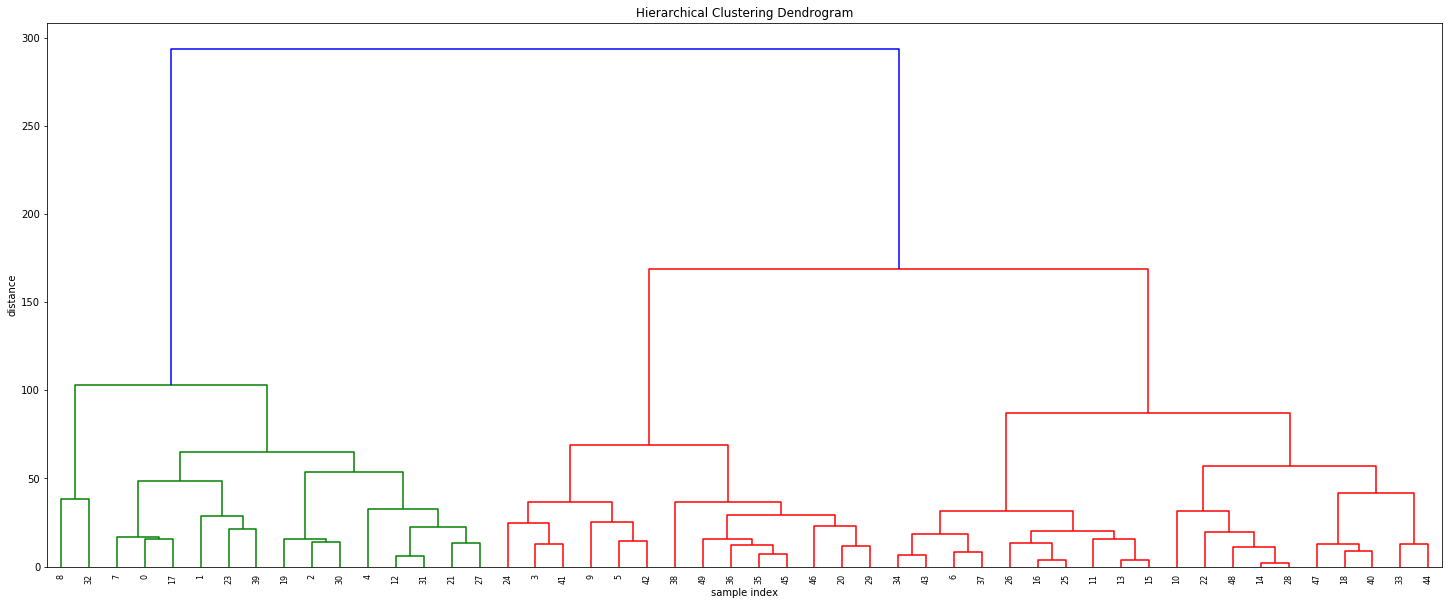

In [322]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

(b) (5 points) Cut the dendrogram at a height that results in three distinct clusters.
Which states belong to which clusters?

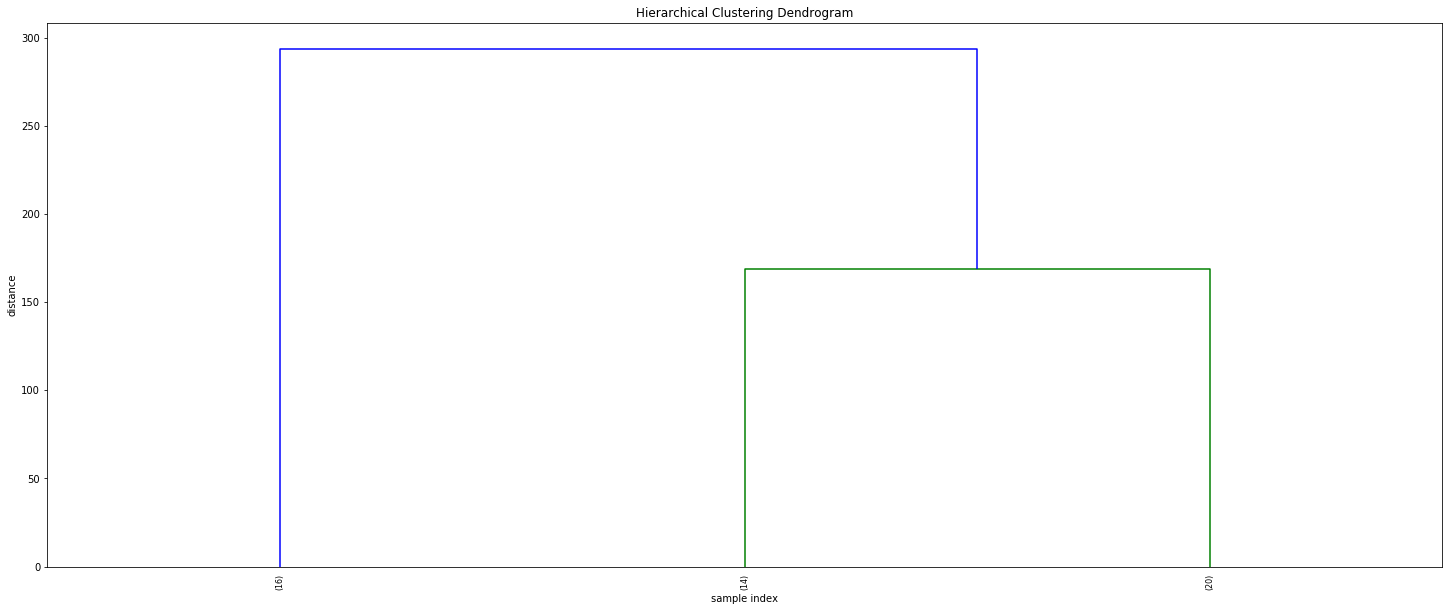

In [327]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

{'icoord': [[15.0, 15.0, 25.0, 25.0], [5.0, 5.0, 20.0, 20.0]],
 'dcoord': [[0.0, 168.6114171697753, 168.6114171697753, 0.0],
  [0.0, 293.6227511620992, 293.6227511620992, 168.6114171697753]],
 'ivl': ['(16)', '(14)', '(20)'],
 'leaves': [96, 94, 95],
 'color_list': ['g', 'b']}

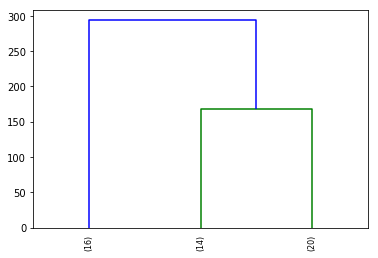

In [332]:
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    get_leaves=True,
)

In [334]:
from scipy.cluster.hierarchy import fcluster, cut_tree

In [337]:
cut_tree(Z, 3)

array([[0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [2],
       [0],
       [0],
       [1],
       [2],
       [2],
       [0],
       [2],
       [2],
       [2],
       [2],
       [0],
       [2],
       [0],
       [1],
       [0],
       [2],
       [0],
       [1],
       [2],
       [2],
       [0],
       [2],
       [1],
       [0],
       [0],
       [0],
       [2],
       [2],
       [1],
       [1],
       [2],
       [1],
       [0],
       [2],
       [1],
       [1],
       [2],
       [2],
       [1],
       [1],
       [2],
       [2],
       [1]])

In [339]:
members = df
members['group'] = cut_tree(Z, 3)
members = members.drop(['Murder', 'Assault', 'UrbanPop', 'Rape'], axis=1)
members

,group
Alabama,0
Alaska,0
Arizona,0
Arkansas,1
California,0
Colorado,1
Connecticut,2
Delaware,0
Florida,0
Georgia,1


In [340]:
group0 = members.query('group == 0')
group1 = members.query('group == 1')
group2 = members.query('group == 2')

In [341]:
group0

,group
Alabama,0
Alaska,0
Arizona,0
California,0
Delaware,0
Florida,0
Illinois,0
Louisiana,0
Maryland,0
Michigan,0


In [342]:
group1

,group
Arkansas,1
Colorado,1
Georgia,1
Massachusetts,1
Missouri,1
New Jersey,1
Oklahoma,1
Oregon,1
Rhode Island,1
Tennessee,1


In [343]:
group2

,group
Connecticut,2
Hawaii,2
Idaho,2
Indiana,2
Iowa,2
Kansas,2
Kentucky,2
Maine,2
Minnesota,2
Montana,2


(c) (5 points) Hierarchically cluster the states using complete linkage and Euclidean
distance, after scaling the variables to have standard deviation one.

In [344]:
X

,Murder,Assault,UrbanPop,Rape
Alabama,1.255179,0.790787,-0.526195,-0.003451
Alaska,0.513019,1.118060,-1.224067,2.509424
Arizona,0.072361,1.493817,1.009122,1.053466
Arkansas,0.234708,0.233212,-1.084492,-0.186794
California,0.281093,1.275635,1.776781,2.088814
Colorado,0.025976,0.402909,0.869548,1.883901
Connecticut,-1.040880,-0.736484,0.799761,-1.092723
Delaware,-0.437875,0.815030,0.450825,-0.585834
Florida,1.765415,1.990786,1.009122,1.150530
Georgia,2.229265,0.487757,-0.386621,0.492653


In [345]:
Z = linkage(X, 'complete')

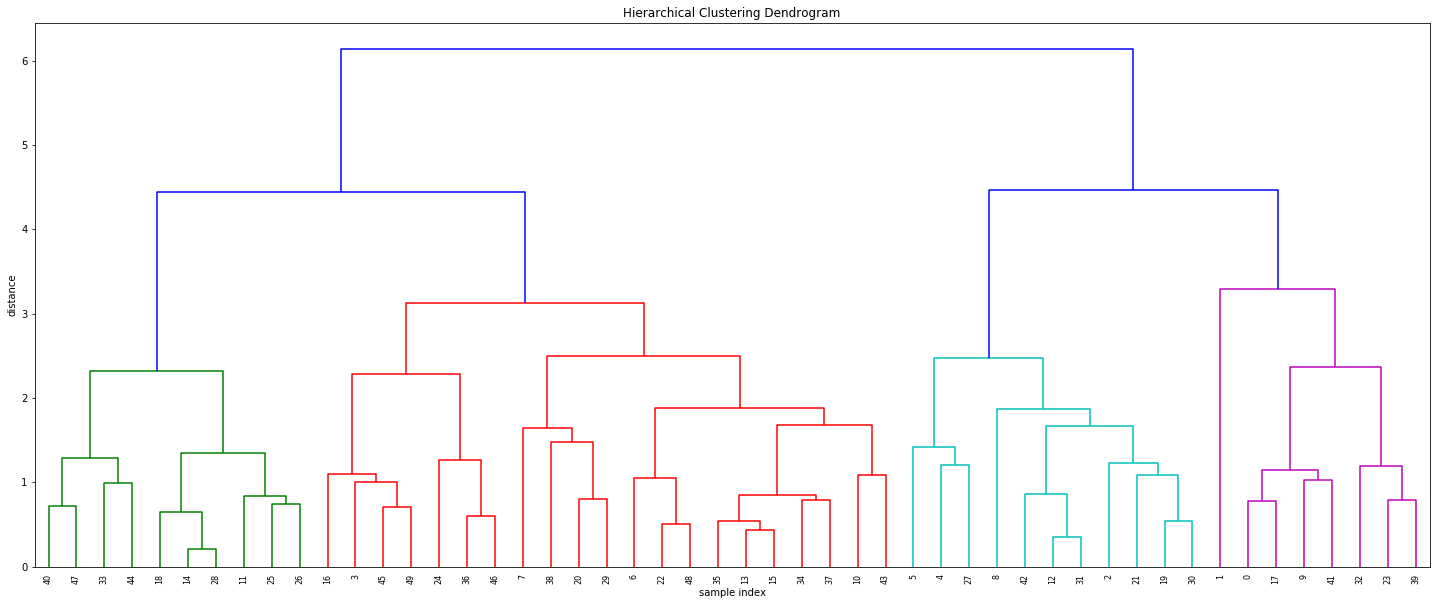

In [346]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

(d) (5 points) What effect does scaling the variables have on the hierarchical clustering
obtained? In your opinion, should the variables be scaled before the interobservation
dissimilarities are computed? Provide a justification for your answer.

Scaling the variables created more clusters by seperating the states and clusters to a greater extent. In my opinion the data should be scaled so that the model can make an appropriate analysis of how each variable influences the clustering rather than being influenced by the measurement level.